In [15]:
import numpy as np
import matplotlib.pyplot as plt
import copy

## Earth Revolution

<font  face=Times color=darkblue size=3> For the earth revolution due to the gravitational fore, the equation of motion is: $\frac{d^2\vec r}{dt^2}=-\frac{\mu}{r^3}\vec r$, where $\mu=G(M+m)\approx GM$. We already know that the earth moves in an ellipse aroung the sum, and now we can test the methods introduced before to numerically solve the differential equations and plot the trajectory to see the performance of the methods (here we consider the best Runge-Kutta method, the velocity Verlet method and the worst Euler method.).
    <br><br>
    The initial condition is: $x=a(1-e)$, $y=0$, $v_x=0$, $v_y=\sqrt{\mu(1+e)/[a(1-e)]}$. we take $\mu=2.958\times 10^{-4}$, semi-major axis $a=1.00000011$, and eccentricity $e=0.01671022$. We take the unit of $t$ to be 1 day.
    

In [16]:
initial_x=1.00000011*(1-0.01671022)
initial_vy=np.sqrt(2.958*np.power(0.1,4)*(1+0.01671022)/(1.00000011*(1-0.01671022 )))
mu=2.958*np.power(0.1,4)

### Euler Method

In [17]:
tau=1
x_eu=[initial_x]
y_eu=[0]
vx_eu=[0]
vy_eu=[initial_vy]
t_eu=[0]

In [18]:
for i in range(1,400):
    t_eu.append(tau*i)
    x_eu.append(x_eu[i-1]+tau*vx_eu[i-1])
    ax_here= (-mu/np.power((x_eu[i-1]**2+y_eu[i-1]**2),1.5))*x_eu[i-1]
    vx_eu.append(vx_eu[i-1]+tau*ax_here)
    y_eu.append(y_eu[i-1]+tau*vy_eu[i-1])
    ay_here= (-mu/np.power((x_eu[i-1]**2+y_eu[i-1]**2),1.5))*y_eu[i-1]
    vy_eu.append(vy_eu[i-1]+tau*ay_here)

In [19]:
tau=0.1
x_eu1=[initial_x]
y_eu1=[0]
vx_eu1=[0]
vy_eu1=[initial_vy]
t_eu1=[0]

In [20]:
for i in range(1,4000):
    t_eu1.append(tau*i)
    x_eu1.append(x_eu1[i-1]+tau*vx_eu1[i-1])
    ax_here= (-mu/np.power((x_eu1[i-1]**2+y_eu1[i-1]**2),1.5))*x_eu1[i-1]
    vx_eu1.append(vx_eu1[i-1]+tau*ax_here)
    y_eu1.append(y_eu1[i-1]+tau*vy_eu1[i-1])
    ay_here= (-mu/np.power((x_eu1[i-1]**2+y_eu1[i-1]**2),1.5))*y_eu1[i-1]
    vy_eu1.append(vy_eu1[i-1]+tau*ay_here)

In [21]:
tau=4
x_eu2=[initial_x]
y_eu2=[0]
vx_eu2=[0]
vy_eu2=[initial_vy]
t_eu2=[0]

In [22]:
for i in range(1,100):
    t_eu2.append(tau*i)
    x_eu2.append(x_eu2[i-1]+tau*vx_eu2[i-1])
    ax_here= (-mu/np.power((x_eu2[i-1]**2+y_eu2[i-1]**2),1.5))*x_eu2[i-1]
    vx_eu2.append(vx_eu2[i-1]+tau*ax_here)
    y_eu2.append(y_eu2[i-1]+tau*vy_eu2[i-1])
    ay_here= (-mu/np.power((x_eu2[i-1]**2+y_eu2[i-1]**2),1.5))*y_eu2[i-1]
    vy_eu2.append(vy_eu2[i-1]+tau*ay_here)

Text(0, 0.5, 'y')

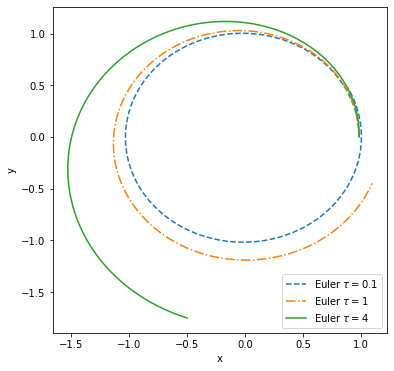

In [40]:
plt.figure(figsize=(6,6))
plt.plot(x_eu1,y_eu1,'--',label=r'Euler $\tau=0.1$')
plt.plot(x_eu,y_eu,'-.',label=r'Euler $\tau=1$')
plt.plot(x_eu2,y_eu2,'-',label=r'Euler $\tau=4$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

<font  face=Times color=darkblue size=3> We have simulated 3 values of $\tau$ and totally 400 days, and again see that that the error of Euler method increases with time and the larger the time-step, the larger the error.

### Velocity Verlet Method

In [41]:
tau=0.1
x_vv_tauP1=[initial_x]
y_vv_tauP1=[0]
vx_vv_tauP1=[0]
vy_vv_tauP1=[initial_vy]
t_vv_tauP1=[0]

In [42]:
for i in range(1,4000):
    t_vv_tauP1.append(tau*i)
    ax_vv = (-mu/np.power((x_vv_tauP1[i-1]**2+y_vv_tauP1[i-1]**2),1.5))*x_vv_tauP1[i-1]
    ay_vv = (-mu/np.power((x_vv_tauP1[i-1]**2+y_vv_tauP1[i-1]**2),1.5))*y_vv_tauP1[i-1]
    x_vv_tauP1.append(x_vv_tauP1[i-1]+tau*vx_vv_tauP1[i-1]+0.5*np.power(tau,2)*ax_vv)
    y_vv_tauP1.append(y_vv_tauP1[i-1]+tau*vy_vv_tauP1[i-1]+0.5*np.power(tau,2)*ay_vv)
    ax_vvi = (-mu/np.power((x_vv_tauP1[i]**2+y_vv_tauP1[i]**2),1.5))*x_vv_tauP1[i]
    ay_vvi = (-mu/np.power((x_vv_tauP1[i]**2+y_vv_tauP1[i]**2),1.5))*y_vv_tauP1[i-1]
    vx_vv_tauP1.append(vx_vv_tauP1[i-1]+0.5*tau*(ax_vv+ax_vvi))
    vy_vv_tauP1.append(vy_vv_tauP1[i-1]+0.5*tau*(ay_vv+ay_vvi))

In [43]:
tau=1
x_vv_tau1=[initial_x]
y_vv_tau1=[0]
vx_vv_tau1=[0]
vy_vv_tau1=[initial_vy]
t_vv_tau1=[0]
for i in range(1,400):
    t_vv_tau1.append(tau*i)
    ax_vv = (-mu/np.power((x_vv_tau1[i-1]**2+y_vv_tau1[i-1]**2),1.5))*x_vv_tau1[i-1]
    ay_vv = (-mu/np.power((x_vv_tau1[i-1]**2+y_vv_tau1[i-1]**2),1.5))*y_vv_tau1[i-1]
    x_vv_tau1.append(x_vv_tau1[i-1]+tau*vx_vv_tau1[i-1]+0.5*np.power(tau,2)*ax_vv)
    y_vv_tau1.append(y_vv_tau1[i-1]+tau*vy_vv_tau1[i-1]+0.5*np.power(tau,2)*ay_vv)
    ax_vvi = (-mu/np.power((x_vv_tau1[i]**2+y_vv_tau1[i]**2),1.5))*x_vv_tau1[i]
    ay_vvi = (-mu/np.power((x_vv_tau1[i]**2+y_vv_tau1[i]**2),1.5))*y_vv_tau1[i-1]
    vx_vv_tau1.append(vx_vv_tau1[i-1]+0.5*tau*(ax_vv+ax_vvi))
    vy_vv_tau1.append(vy_vv_tau1[i-1]+0.5*tau*(ay_vv+ay_vvi))


In [44]:
tau=4
x_vv_tau4=[initial_x]
y_vv_tau4=[0]
vx_vv_tau4=[0]
vy_vv_tau4=[initial_vy]
t_vv_tau4=[0]
for i in range(1,100):
    t_vv_tau4.append(tau*i)
    ax_vv = (-mu/np.power((x_vv_tau4[i-1]**2+y_vv_tau4[i-1]**2),1.5))*x_vv_tau4[i-1]
    ay_vv = (-mu/np.power((x_vv_tau4[i-1]**2+y_vv_tau4[i-1]**2),1.5))*y_vv_tau4[i-1]
    x_vv_tau4.append(x_vv_tau4[i-1]+tau*vx_vv_tau4[i-1]+0.5*np.power(tau,2)*ax_vv)
    y_vv_tau4.append(y_vv_tau4[i-1]+tau*vy_vv_tau4[i-1]+0.5*np.power(tau,2)*ay_vv)
    ax_vvi = (-mu/np.power((x_vv_tau4[i]**2+y_vv_tau4[i]**2),1.5))*x_vv_tau4[i]
    ay_vvi = (-mu/np.power((x_vv_tau4[i]**2+y_vv_tau4[i]**2),1.5))*y_vv_tau4[i-1]
    vx_vv_tau4.append(vx_vv_tau4[i-1]+0.5*tau*(ax_vv+ax_vvi))
    vy_vv_tau4.append(vy_vv_tau4[i-1]+0.5*tau*(ay_vv+ay_vvi))

Text(0, 0.5, 'y')

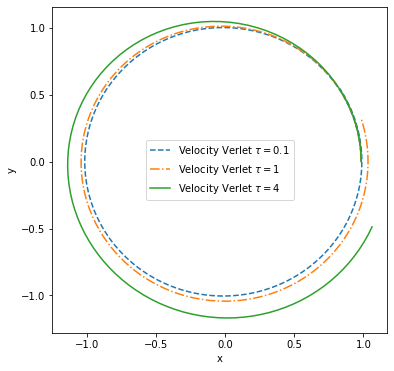

In [45]:
plt.figure(figsize=(6,6))
plt.plot(x_vv_tauP1,y_vv_tauP1,'--',label=r'Velocity Verlet $\tau=0.1$')
plt.plot(x_vv_tau1,y_vv_tau1,'-.',label=r'Velocity Verlet $\tau=1$')
plt.plot(x_vv_tau4,y_vv_tau4,'-',label=r'Velocity Verlet $\tau=4$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### 4-th Order Runge-Kutta Method

In [46]:
tau=4
x_rk=[initial_x]
y_rk=[0]
vx_rk=[0]
vy_rk=[initial_vy]
t_rk=[0]

In [47]:
for i in range(1,100):
    t_rk.append(tau*i)
    k1x=tau*vx_rk[i-1]
    ax_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*x_rk[i-1]
    l1x=tau*ax_here1
    k2x=tau*(vx_rk[i-1]+0.5*l1x)
    ax_here2= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(x_rk[i-1]+0.5*k1x)
    l2x=tau*ax_here2
    k3x=tau*(vx_rk[i-1]+0.5*l2x)
    ax_here3= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(x_rk[i-1]+0.5*k2x)
    l3x=tau*ax_here3
    k4x=tau*(vx_rk[i-1]+l3x)
    ax_here4= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(x_rk[i-1]+k3x)
    l4x=tau*ax_here4
    x_rk.append(x_rk[i-1]+(1/6)*(k1x+2*k2x+2*k3x+k4x))
    vx_rk.append(vx_rk[i-1]+(1/6)*(l1x+2*l2x+2*l3x+l4x))
    #
    k1y=tau*vy_rk[i-1]
    ay_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*y_rk[i-1]
    l1y=tau*ay_here1
    k2y=tau*(vy_rk[i-1]+0.5*l1y)
    ay_here2= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(y_rk[i-1]+0.5*k1y)
    l2y=tau*ay_here2
    k3y=tau*(vy_rk[i-1]+0.5*l2y)
    ay_here3= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(y_rk[i-1]+0.5*k2y)
    l3y=tau*ay_here3
    k4y=tau*(vy_rk[i-1]+l3y)
    ay_here4= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(y_rk[i-1]+k3y)
    l4y=tau*ay_here4
    y_rk.append(y_rk[i-1]+(1/6)*(k1y+2*k2y+2*k3y+k4y))
    vy_rk.append(vy_rk[i-1]+(1/6)*(l1y+2*l2y+2*l3y+l4y))
    

In [48]:
xrk_4=copy.deepcopy(x_rk)
yrk_4=copy.deepcopy(y_rk)

In [49]:
tau=20
x_rk=[initial_x]
y_rk=[0]
vx_rk=[0]
vy_rk=[initial_vy]
t_rk=[0]

In [50]:
for i in range(1,20):
    t_rk.append(tau*i)
    k1x=tau*vx_rk[i-1]
    ax_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*x_rk[i-1]
    l1x=tau*ax_here1
    k2x=tau*(vx_rk[i-1]+0.5*l1x)
    ax_here2= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(x_rk[i-1]+0.5*k1x)
    l2x=tau*ax_here2
    k3x=tau*(vx_rk[i-1]+0.5*l2x)
    ax_here3= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(x_rk[i-1]+0.5*k2x)
    l3x=tau*ax_here3
    k4x=tau*(vx_rk[i-1]+l3x)
    ax_here4= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(x_rk[i-1]+k3x)
    l4x=tau*ax_here4
    x_rk.append(x_rk[i-1]+(1/6)*(k1x+2*k2x+2*k3x+k4x))
    vx_rk.append(vx_rk[i-1]+(1/6)*(l1x+2*l2x+2*l3x+l4x))
    #
    k1y=tau*vy_rk[i-1]
    ay_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*y_rk[i-1]
    l1y=tau*ay_here1
    k2y=tau*(vy_rk[i-1]+0.5*l1y)
    ay_here2= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(y_rk[i-1]+0.5*k1y)
    l2y=tau*ay_here2
    k3y=tau*(vy_rk[i-1]+0.5*l2y)
    ay_here3= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(y_rk[i-1]+0.5*k2y)
    l3y=tau*ay_here3
    k4y=tau*(vy_rk[i-1]+l3y)
    ay_here4= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(y_rk[i-1]+k3y)
    l4y=tau*ay_here4
    y_rk.append(y_rk[i-1]+(1/6)*(k1y+2*k2y+2*k3y+k4y))
    vy_rk.append(vy_rk[i-1]+(1/6)*(l1y+2*l2y+2*l3y+l4y))

In [51]:
xrk_20=copy.deepcopy(x_rk)
yrk_20=copy.deepcopy(y_rk)

In [52]:
tau=40
x_rk=[initial_x]
y_rk=[0]
vx_rk=[0]
vy_rk=[initial_vy]
t_rk=[0]

In [53]:
for i in range(1,10):
    t_rk.append(tau*i)
    k1x=tau*vx_rk[i-1]
    ax_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*x_rk[i-1]
    l1x=tau*ax_here1
    k2x=tau*(vx_rk[i-1]+0.5*l1x)
    ax_here2= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(x_rk[i-1]+0.5*k1x)
    l2x=tau*ax_here2
    k3x=tau*(vx_rk[i-1]+0.5*l2x)
    ax_here3= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(x_rk[i-1]+0.5*k2x)
    l3x=tau*ax_here3
    k4x=tau*(vx_rk[i-1]+l3x)
    ax_here4= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(x_rk[i-1]+k3x)
    l4x=tau*ax_here4
    x_rk.append(x_rk[i-1]+(1/6)*(k1x+2*k2x+2*k3x+k4x))
    vx_rk.append(vx_rk[i-1]+(1/6)*(l1x+2*l2x+2*l3x+l4x))
    #
    k1y=tau*vy_rk[i-1]
    ay_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*y_rk[i-1]
    l1y=tau*ay_here1
    k2y=tau*(vy_rk[i-1]+0.5*l1y)
    ay_here2= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(y_rk[i-1]+0.5*k1y)
    l2y=tau*ay_here2
    k3y=tau*(vy_rk[i-1]+0.5*l2y)
    ay_here3= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(y_rk[i-1]+0.5*k2y)
    l3y=tau*ay_here3
    k4y=tau*(vy_rk[i-1]+l3y)
    ay_here4= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*(y_rk[i-1]+k3y)
    l4y=tau*ay_here4
    y_rk.append(y_rk[i-1]+(1/6)*(k1y+2*k2y+2*k3y+k4y))
    vy_rk.append(vy_rk[i-1]+(1/6)*(l1y+2*l2y+2*l3y+l4y))

In [54]:
xrk_40=copy.deepcopy(x_rk)
yrk_40=copy.deepcopy(y_rk)

Text(0, 0.5, 'y')

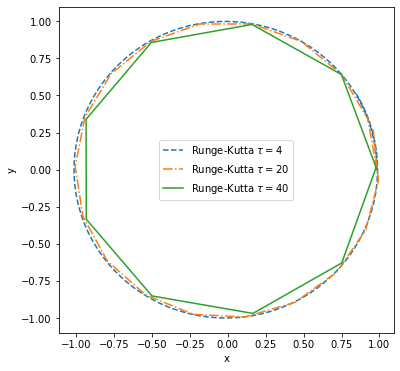

In [55]:
plt.figure(figsize=(6,6))
plt.plot(xrk_4,yrk_4,'--',label=r'Runge-Kutta $\tau=4$')
plt.plot(xrk_20,yrk_20,'-.',label=r'Runge-Kutta $\tau=20$')
plt.plot(xrk_40,yrk_40,label=r'Runge-Kutta $\tau=40$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

<font  face=Times color=darkblue size=3> We see that for this method, the error will not increase with time but with the time-step.

### Comparison

Text(0, 0.5, 'y')

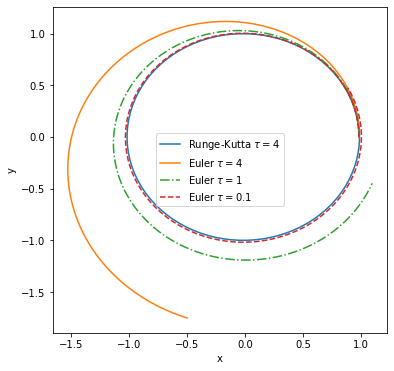

In [56]:
plt.figure(figsize=(6,6))
plt.plot(xrk_4,yrk_4,label=r'Runge-Kutta $\tau=4$')
plt.plot(x_eu2,y_eu2,'-',label=r'Euler $\tau=4$')
plt.plot(x_eu,y_eu,'-.',label=r'Euler $\tau=1$')
plt.plot(x_eu1,y_eu1,'--',label=r'Euler $\tau=0.1$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

<font  face=Times color=darkblue size=3> We can see that Runge-Kutta method is much better than the Euler method.